In [2]:
#start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Spark_Housing').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/11 04:28:49 INFO SparkEnv: Registering MapOutputTracker
23/12/11 04:28:49 INFO SparkEnv: Registering BlockManagerMaster
23/12/11 04:28:49 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/11 04:28:49 INFO SparkEnv: Registering OutputCommitCoordinator


In [4]:
#loading the data
path = 'gs://hive_storage-task/california_housing_train.csv'
file_type = 'csv'

#csv options
infer_schema = 'true'
first_row_is_header = 'true'
delimiter = ','

#import csv
df = spark.read.format(file_type)\
     .option('inferSchema', infer_schema)\
     .option('header', first_row_is_header)\
     .option('sep',delimiter)\
     .load(path)

In [5]:
total_rows = df.count()

In [6]:
print(total_rows)

17000


In [7]:
print(total_rows)

17000


In [8]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [9]:
df.head()

Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0)

In [11]:
type(df.head())

pyspark.sql.types.Row

In [12]:
df.take(4)

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0)]

In [13]:
df.limit(5).collect()

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0),
 Row(longitude=-114.57, latitude=33.57, housing_median_age=20.0, total_rooms=1454.0, total_bedrooms=326.0, population=624.0, households=262.0, median_income=1.925, median_house_value=65500.0)]

In [14]:
df.show(10)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [16]:
df.describe().show()

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [18]:
df.select('population').show()

+----------+
|population|
+----------+
|    1015.0|
|    1129.0|
|     333.0|
|     515.0|
|     624.0|
|     671.0|
|    1841.0|
|     375.0|
|    3134.0|
|     787.0|
|    2434.0|
|    1182.0|
|     580.0|
|    1346.0|
|     949.0|
|    1005.0|
|     666.0|
|      64.0|
|     775.0|
|      29.0|
+----------+
only showing top 20 rows



In [20]:
df.select('population','households').show()

+----------+----------+
|population|households|
+----------+----------+
|    1015.0|     472.0|
|    1129.0|     463.0|
|     333.0|     117.0|
|     515.0|     226.0|
|     624.0|     262.0|
|     671.0|     239.0|
|    1841.0|     633.0|
|     375.0|     158.0|
|    3134.0|    1056.0|
|     787.0|     271.0|
|    2434.0|     824.0|
|    1182.0|     437.0|
|     580.0|     211.0|
|    1346.0|     479.0|
|     949.0|     300.0|
|    1005.0|     401.0|
|     666.0|     256.0|
|      64.0|      27.0|
|     775.0|     320.0|
|      29.0|      15.0|
+----------+----------+
only showing top 20 rows



In [21]:
df.select('median_income').describe().show()

+-------+------------------+
|summary|     median_income|
+-------+------------------+
|  count|             17000|
|   mean| 3.883578100000021|
| stddev|1.9081565183791036|
|    min|            0.4999|
|    max|           15.0001|
+-------+------------------+



In [22]:
df.filter(df.population > 10000).show() #filter for pop > 10k

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.12|   33.52|               4.0|    30401.0|        4957.0|   13251.0|    4339.0|       4.5841|          212300.0|
|  -117.42|   33.35|              14.0|    25135.0|        4819.0|   35682.0|    4769.0|       2.5729|          134400.0|
|  -117.61|    34.1|               9.0|    18956.0|        4095.0|   10323.0|    3832.0|       3.6033|          132600.0|
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.75|   34.01|               4.0|    22128.0|        3522.0|   10450.0|    3258.0|       6.1287|          289600.0|
|  -117.78|   34.03|    

In [24]:
df.filter((df.population > 10000)& (df.households>=5000)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -117.78|   34.03|               8.0|    32054.0|        5290.0|   15507.0|    5050.0|       6.0191|          253900.0|
|  -121.79|   36.64|              11.0|    32627.0|        6445.0|   28566.0|    6082.0|       2.3087|          118800.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [25]:
df_pd = df.toPandas()

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

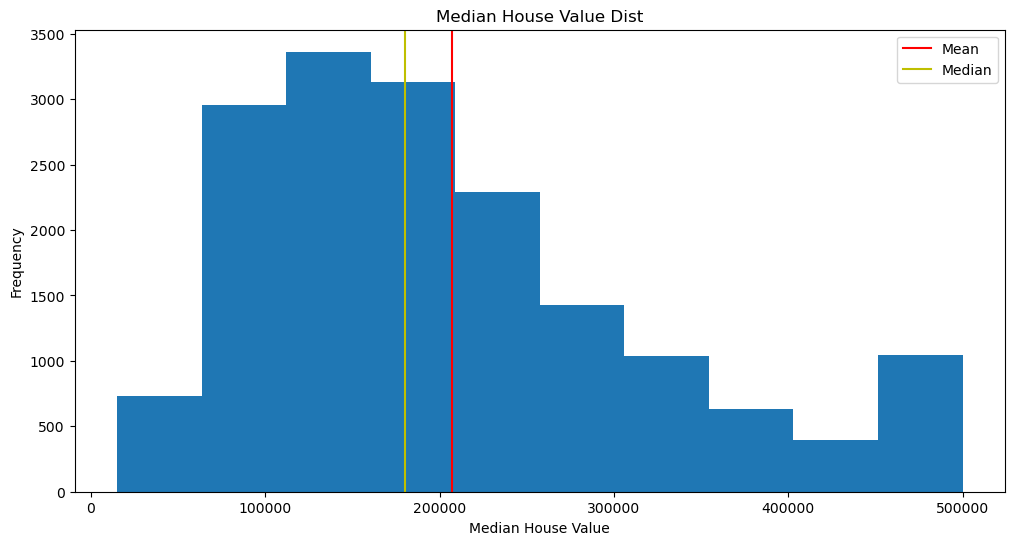

In [31]:
fig = plt.figure(figsize = (12,6))
plt.hist(df_pd['median_house_value'], bins = 10, range =(14999,500001))
plt.title('Median House Value Dist')
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.axvline(x = np.mean(df_pd['median_house_value']), color='r', label = 'Mean')
plt.axvline(x = np.median(df_pd['median_house_value']), color='y', label = 'Median')
plt.legend()

Text(0, 0.5, 'Age')

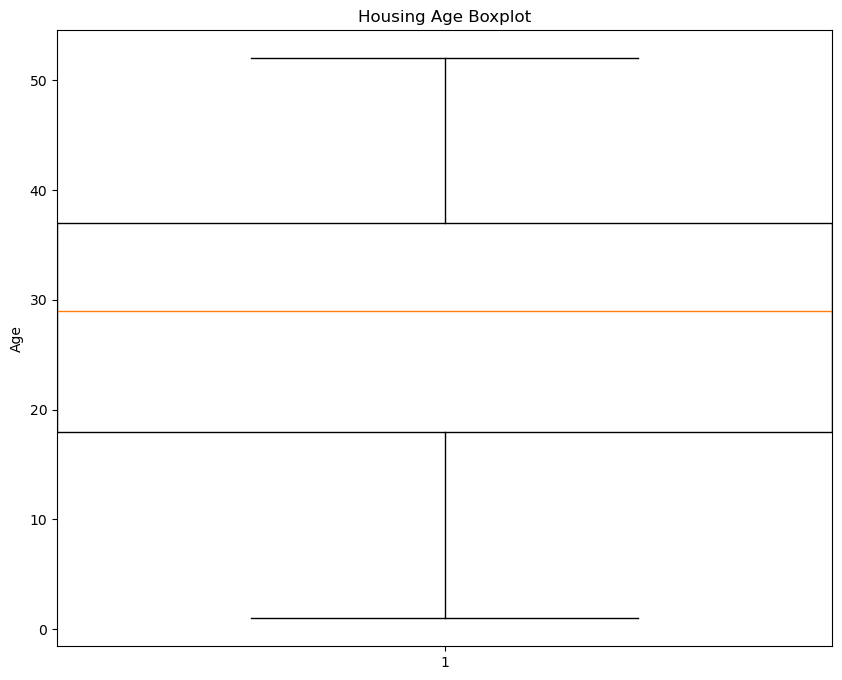

In [35]:
fig2 = plt.figure(figsize = (10,8))
plt.boxplot(df_pd['housing_median_age'], widths = 1)
plt.title('Housing Age Boxplot')
plt.ylabel('Age')

In [37]:
sample_df = df.sample(withReplacement =False, fraction = 0.1)

In [38]:
sample_df.count()

1696

In [39]:
avg_house_value = df.filter(df['housing_median_age']> 20).agg({'median_house_value':'avg'}).collect()[0][0]

In [40]:
avg_house_value

213293.52743618013

In [41]:
 df.filter(df['housing_median_age']> 20).agg({'median_house_value':'avg'}).collect()[0][0]

213293.52743618013

In [42]:
 df.filter(df['housing_median_age']> 20).agg({'median_house_value':'avg'}).collect()

[Row(avg(median_house_value)=213293.52743618013)]